In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (replace with your actual file paths)
production_df = pd.read_excel('data\observatory_production_aggregated.xlsx')
demand_df = pd.read_excel('data\observatory_demand_aggregated.xlsx')
research_df = pd.read_csv('data\location_hydrogeneuroperesearch_summary.csv')
patents_df = pd.read_csv('data\locations_patent_data.csv')
fueling_stations_df = pd.read_csv('data\location_hydrogen_fuelling_stations.csv')
production_costs_df = pd.read_excel('data\observatory_production_cost.xlsx')
vehicels_df = pd.read_excel('data\observatory_hydrogen_vehicel.xlsx')

# Cleaning Fuelling stations

In [161]:
import pandas as pd
country_mapping = {
    'Deutschland': 'Germany',
    'Frankreich': 'France',
    'Niederlande': 'Netherlands',
    'Schweiz': 'Switzerland',
    'Belgien': 'Belgium',
    'Dänemark': 'Denmark',
    'Tschechien': 'Czech Republic',
    'Polen': 'Poland',
    'Luxemburg': 'Luxembourg',
    'Germany': 'Germany',  # Add this line to ensure the original names are also mapped
    'France': 'France',    # Add this line
    'Netherlands': 'Netherlands',  # Add this line
    'Switzerland': 'Switzerland',  # Add this line
    'Belgium': 'Belgium',  # Add this line
    'Denmark': 'Denmark',  # Add this line
    'Czech Republic': 'Czech Republic',  # Add this line
    'Poland': 'Poland',    # Add this line
    'Luxembourg': 'Luxembourg'   # Add this line
}

# Replace German country names with English equivalents
fueling_stations_df['Country'] = fueling_stations_df['Country'].replace(country_mapping)

# Summarize the number of rows per country
print(fueling_stations_df["Country"].value_counts())
#create a new file with the number of rows per country and name the columns "Country" and "Number Stations"
fueling_stations_df["Country"].value_counts().reset_index().rename(columns={"Country":"Country", "count":"Number Stations"}).to_csv("data/fueling_stations_per_country.csv", index=False)

fueling_stations_df = pd.read_csv('data/fueling_stations_per_country.csv')
fueling_stations_df

Country
Germany           98
France            30
Netherlands       22
Switzerland       12
United Kingdom     9
Belgium            9
Denmark            6
Austria            5
Norway             4
Sweden             4
Spain              3
Czech Republic     2
Poland             2
Italy              1
Iceland            1
Luxembourg         1
Name: count, dtype: int64


,Country,Number Stations
0,Germany,98
1,France,30
2,Netherlands,22
3,Switzerland,12
4,United Kingdom,9
5,Belgium,9
6,Denmark,6
7,Austria,5
8,Norway,4
9,Sweden,4


# Cleaning Production Dataframe

In [162]:
#summarize the values of Output for every country in production_df
#sort by the values of Output

print(production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False))

#save the summarized values of Output for every country in production_df to a new file
production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False).to_csv("data/production_per_country_aggregated.csv")
production_df = pd.read_csv('data/production_per_country_aggregated.csv')


Country
Germany           1.743512e+06
Netherlands       9.752337e+05
Poland            7.846371e+05
Spain             6.144706e+05
Italy             6.079131e+05
United Kingdom    5.691355e+05
France            5.528228e+05
Belgium           4.112296e+05
Greece            3.265575e+05
Hungary           1.880052e+05
Finland           1.764358e+05
Sweden            1.753669e+05
Norway            1.576096e+05
Lithuania         1.436869e+05
Romania           1.343347e+05
Bulgaria          1.211730e+05
Austria           1.154723e+05
Portugal          1.062848e+05
Slovakia          1.055977e+05
Czechia           1.038661e+05
Croatia           6.231680e+04
Denmark           2.495285e+04
Switzerland       2.054980e+04
Ireland           7.864366e+03
Slovenia          1.846500e+03
Iceland           7.530294e+02
Estonia           1.685887e+01
Name: Output T/year, dtype: float64


# Clean the demand Dataframe

In [163]:
demand_df

#summaries the values of Demand for every country in demand_df
#sort by the values of Demand
print(demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False))

#save the summarized values of Demand for every country in demand_df to a new file
demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False).to_csv("data/demand_per_country_aggregated.csv")
demand_df = pd.read_csv('data/demand_per_country_aggregated.csv')

Country
Germany           1.736609e+06
Netherlands       9.840434e+05
Poland            7.840205e+05
Spain             6.118314e+05
Italy             6.077423e+05
United Kingdom    5.689877e+05
France            5.497484e+05
Belgium           3.781651e+05
Greece            3.265357e+05
Hungary           1.878715e+05
Finland           1.763571e+05
Sweden            1.746915e+05
Norway            1.567130e+05
Lithuania         1.436869e+05
Romania           1.337803e+05
Bulgaria          1.211920e+05
Austria           1.161150e+05
Slovakia          1.053859e+05
Czechia           1.041095e+05
Portugal          1.033458e+05
Croatia           6.233575e+04
Denmark           2.528949e+04
Switzerland       2.054980e+04
Ireland           8.226722e+03
Slovenia          1.809405e+03
Iceland           7.530294e+02
Luxemburg         5.749602e+02
Latvia            6.717977e+01
Estonia           1.685887e+01
Name: Total consumption, dtype: float64


# Clean production cost df

In [164]:
#summarize the Value (€/Kg) for every country in production_costs_df for the year 2022
#sort by the values of Value (€/Kg)

print(production_costs_df[production_costs_df["Year"] == 2022].groupby("Country")["Value (€/kg)"].sum().sort_values(ascending=False))

#save the summarized values of Value (€/Kg) for every country in production_costs_df for the year 2022 to a new file
production_costs_df[production_costs_df["Year"] == 2022].groupby("Country")["Value (€/kg)"].sum().sort_values(ascending=False).to_csv("data/production_costs_per_country.csv")
production_costs_df = pd.read_csv('data/production_costs_per_country.csv')

Country
Italy             36.115252
Romania           34.729945
Hungary           33.407684
Slovakia          32.140694
Germany           31.849469
Austria           31.368331
Lithuania         30.813181
Denmark           30.300360
Luxembourg        30.298531
Croatia           29.727574
Sweden            29.574263
Slovenia          28.815715
Netherlands       28.625326
Estonia           28.618730
Belgium           28.286734
Latvia            28.257016
Czechia           28.182995
Finland           27.929211
France            27.791140
Poland            27.303054
Ireland           27.212669
Greece            26.891960
Spain             25.544669
Portugal          25.196424
Bulgaria          22.984392
Cyprus            22.828040
Norway            15.809773
Malta             13.818988
United Kingdom     5.763128
Switzerland        0.000000
Name: Value (€/kg), dtype: float64


In [165]:
vehicels_df
#summarize the values of Number of vehicles for every country in vehicels_df for the year 2022
#sort by the values of Number of vehicles
print(vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False))

#save the summarized values of Number of vehicles for every country in vehicels_df for the year 2022 to a new file
vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False).to_csv("data/vehicles_per_country.csv")
vehicels_df = pd.read_csv('data/vehicles_per_country.csv')
#total sum of the Number of vehicles for all countries

Country
Germany           2233
France             863
Netherlands        693
United Kingdom     351
Switzerland        349
Norway             273
Denmark            234
Poland             125
Belgium            110
Italy               69
Sweden              67
Austria             62
Spain               29
Iceland             27
Czech Republic      12
Luxembourg          10
Latvia              10
Portugal             5
Slovakia             3
Finland              2
Estonia              2
Lithuania            1
Name: FCEV Fleet, dtype: int64


In [166]:
print(vehicels_df["FCEV Fleet"].sum())


5530


In [167]:
#let me inspect all the dataframes
print(production_df.head())
print(demand_df.head())
print(research_df.head())
print(patents_df.head())
print(fueling_stations_df.head())
print(production_costs_df.head())

#check all dataframes if they contain the column "Country"

print("production_df: ", "Country" in production_df.columns)
print("demand_df: ", "Country" in demand_df.columns)
print("research_df: ", "Country" in research_df.columns)
print("patents_df: ", "Country" in patents_df.columns)
print("fueling_stations_df: ", "Country" in fueling_stations_df.columns)
print("production_costs_df: ", "Country" in production_costs_df.columns)
print("vehicels_df: ", "Country" in vehicels_df.columns)


       Country  Output T/year
0      Germany   1.743512e+06
1  Netherlands   9.752337e+05
2       Poland   7.846371e+05
3        Spain   6.144706e+05
4        Italy   6.079131e+05
       Country  Total consumption
0      Germany       1.736609e+06
1  Netherlands       9.840434e+05
2       Poland       7.840205e+05
3        Spain       6.118314e+05
4        Italy       6.077423e+05
   Country  Count Research
0    Spain              27
1    Italy              21
2  Germany              18
3   France              10
4   Poland               8
          Country  Patent Count
0  United Kingdom         79436
1           Spain         24704
2         Germany         13019
3          France          5547
4         Ukraine          2850
          Country  Number Stations
0         Germany               98
1          France               30
2     Netherlands               22
3     Switzerland               12
4  United Kingdom                9
    Country  Value (€/kg)
0     Italy     36.115252


In [168]:
# Merge datasets on 'Country' key using outer join
merged_df = production_df.merge(demand_df, on='Country', how='outer') \
                         .merge(research_df, on='Country', how='outer') \
                         .merge(patents_df, on='Country', how='outer') \
                         .merge(fueling_stations_df, on='Country', how='outer') \
                         .merge(production_costs_df, on='Country', how='outer') \
                         .merge(vehicels_df, on='Country', how='outer')

In [169]:
merged_df

,Country,Output T/year,Total consumption,Count Research,Patent Count,Number Stations,Value (€/kg),FCEV Fleet
0,Austria,1.154723e+05,1.161150e+05,4.0,250.0,5.0,31.368331,62.0
1,Belgium,4.112296e+05,3.781651e+05,6.0,242.0,9.0,28.286734,110.0
2,Bulgaria,1.211730e+05,1.211920e+05,2.0,1244.0,NaN,22.984392,NaN
3,Croatia,6.231680e+04,6.233575e+04,1.0,85.0,NaN,29.727574,NaN
4,Cyprus,NaN,NaN,NaN,NaN,NaN,22.828040,NaN
5,Czech Republic,NaN,NaN,NaN,1671.0,2.0,NaN,12.0
6,Czechia,1.038661e+05,1.041095e+05,1.0,NaN,NaN,28.182995,NaN
7,Czechoslovakia,NaN,NaN,NaN,571.0,NaN,NaN,NaN
8,Denmark,2.495285e+04,2.528949e+04,5.0,390.0,6.0,30.300360,234.0
9,Estonia,1.685887e+01,1.685887e+01,1.0,3.0,NaN,28.618730,2.0


In [170]:
country_mapping = {
    'Czechia': 'Czech Republic',
    'Luxemburg': 'Luxembourg'
}

# Replace different country name variations with the standardized names
merged_df['Country'] = merged_df['Country'].replace(country_mapping)

# Aggregate values for each country
merged_df_new = merged_df.groupby('Country').sum().reset_index()

# Display the DataFrame
merged_df_new

,Country,Output T/year,Total consumption,Count Research,Patent Count,Number Stations,Value (€/kg),FCEV Fleet
0,Austria,1.154723e+05,1.161150e+05,4.0,250.0,5.0,31.368331,62.0
1,Belgium,4.112296e+05,3.781651e+05,6.0,242.0,9.0,28.286734,110.0
2,Bulgaria,1.211730e+05,1.211920e+05,2.0,1244.0,0.0,22.984392,0.0
3,Croatia,6.231680e+04,6.233575e+04,1.0,85.0,0.0,29.727574,0.0
4,Cyprus,0.000000e+00,0.000000e+00,0.0,0.0,0.0,22.828040,0.0
5,Czech Republic,1.038661e+05,1.041095e+05,1.0,1671.0,2.0,28.182995,12.0
6,Czechoslovakia,0.000000e+00,0.000000e+00,0.0,571.0,0.0,0.000000,0.0
7,Denmark,2.495285e+04,2.528949e+04,5.0,390.0,6.0,30.300360,234.0
8,Estonia,1.685887e+01,1.685887e+01,1.0,3.0,0.0,28.618730,2.0
9,Ethiopia,0.000000e+00,0.000000e+00,1.0,0.0,0.0,0.000000,0.0


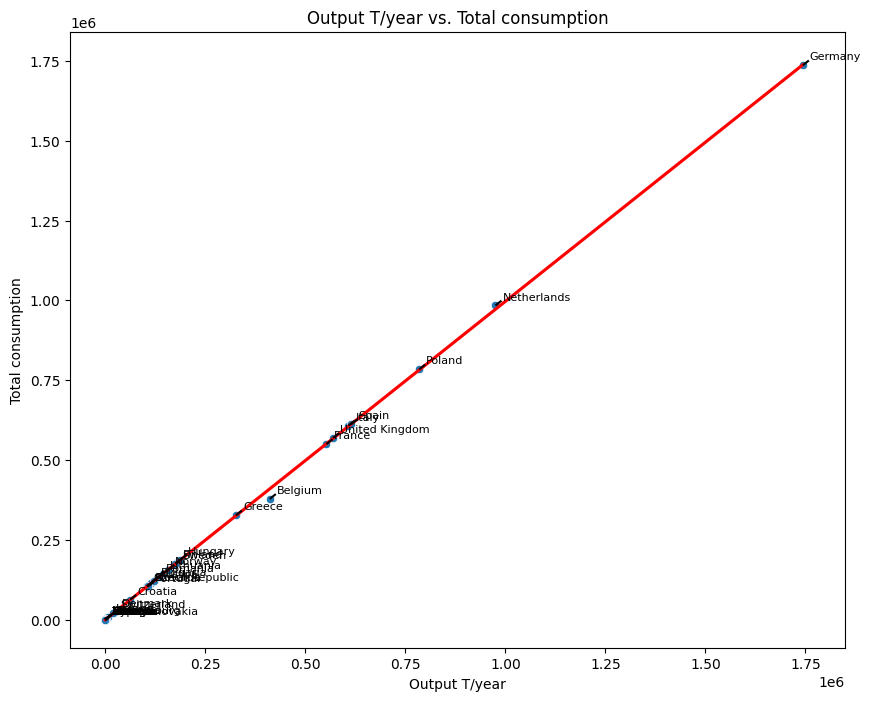

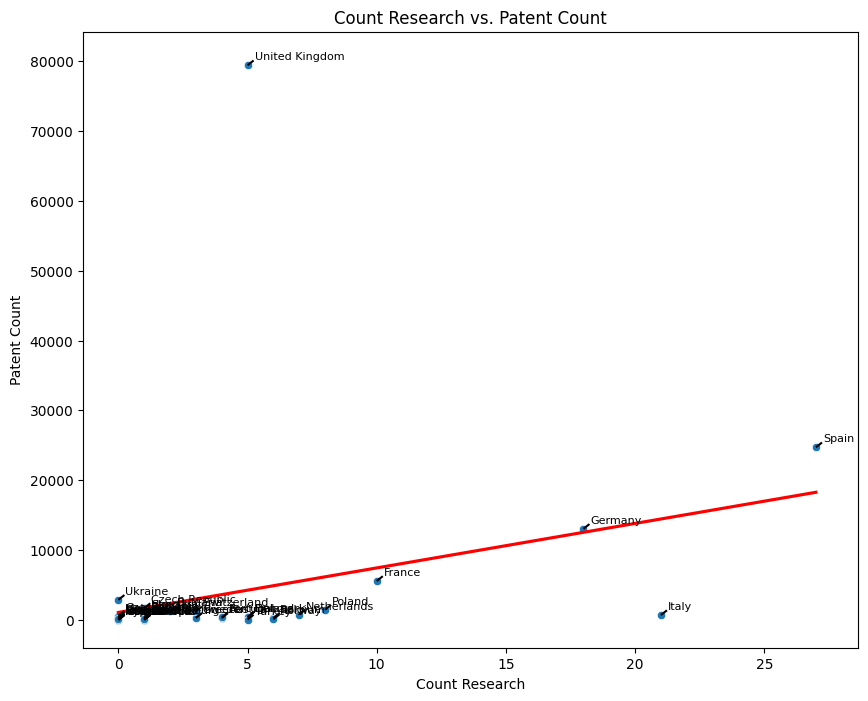

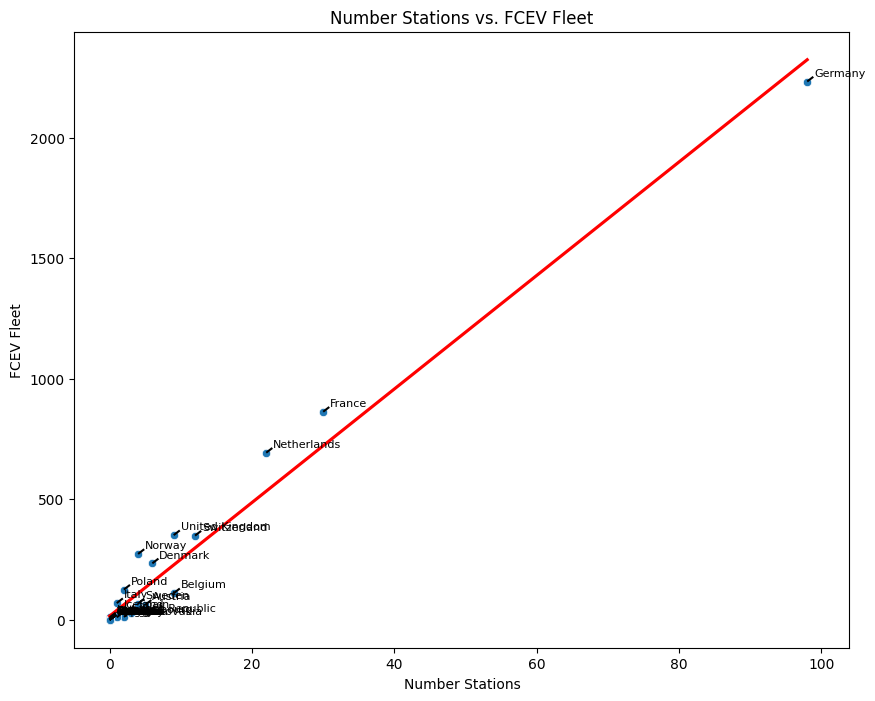

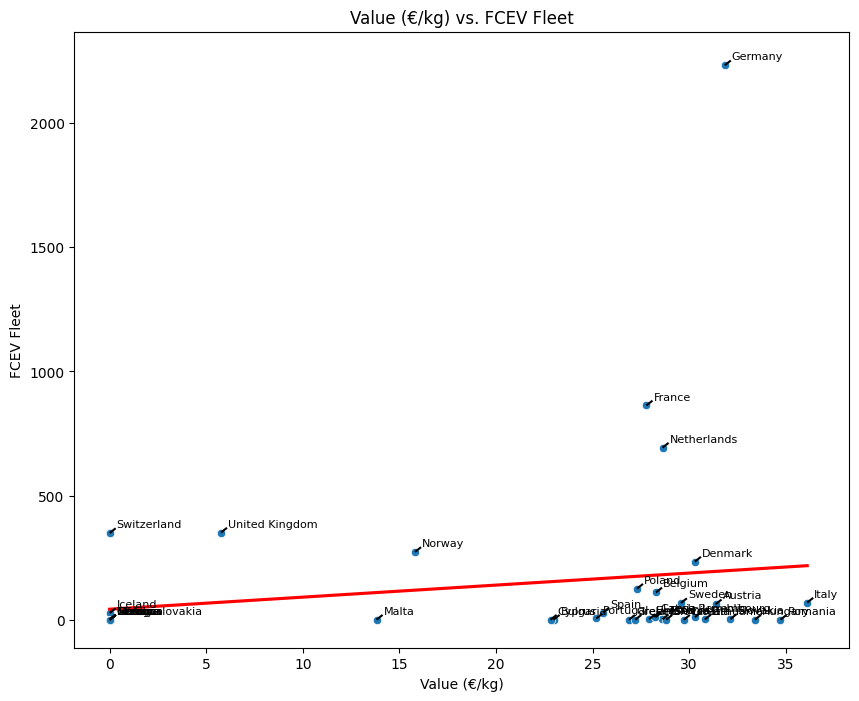

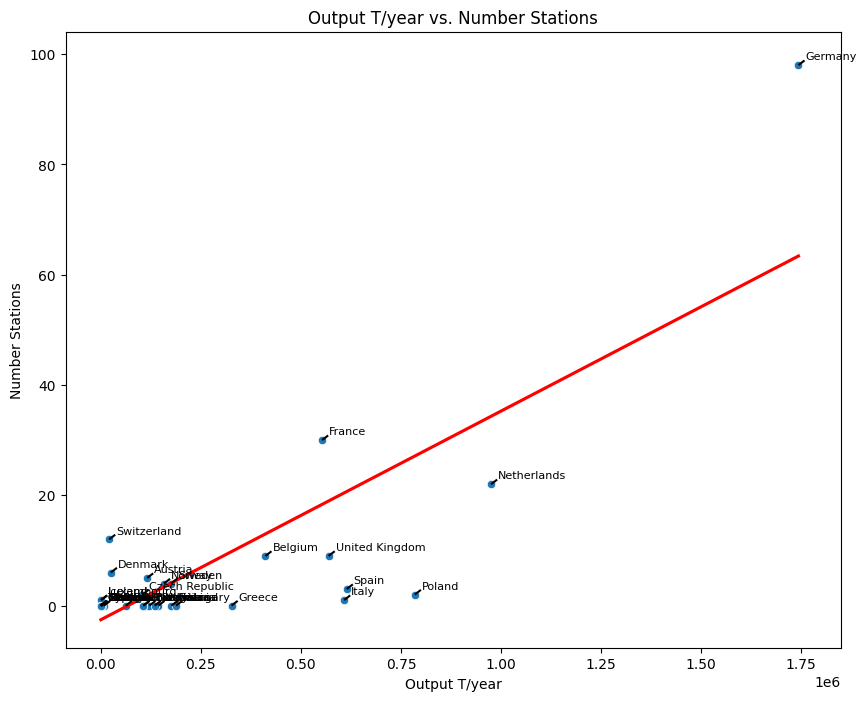

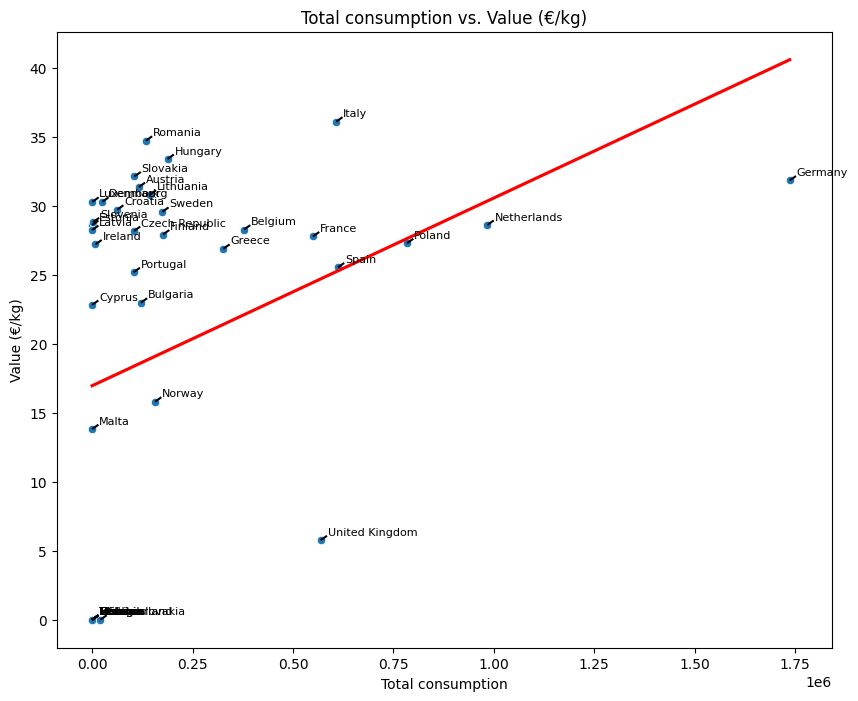

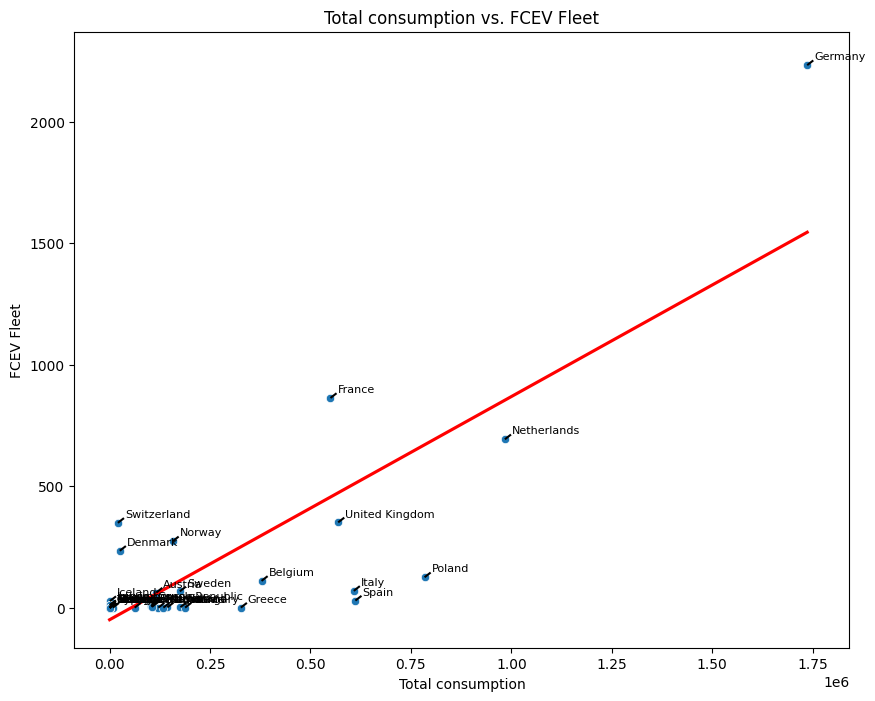

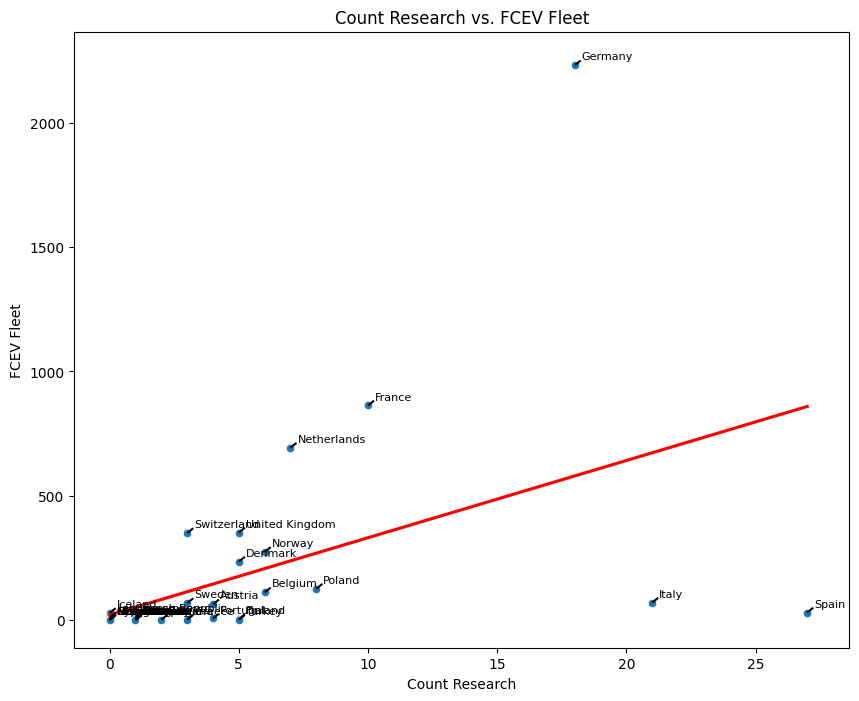

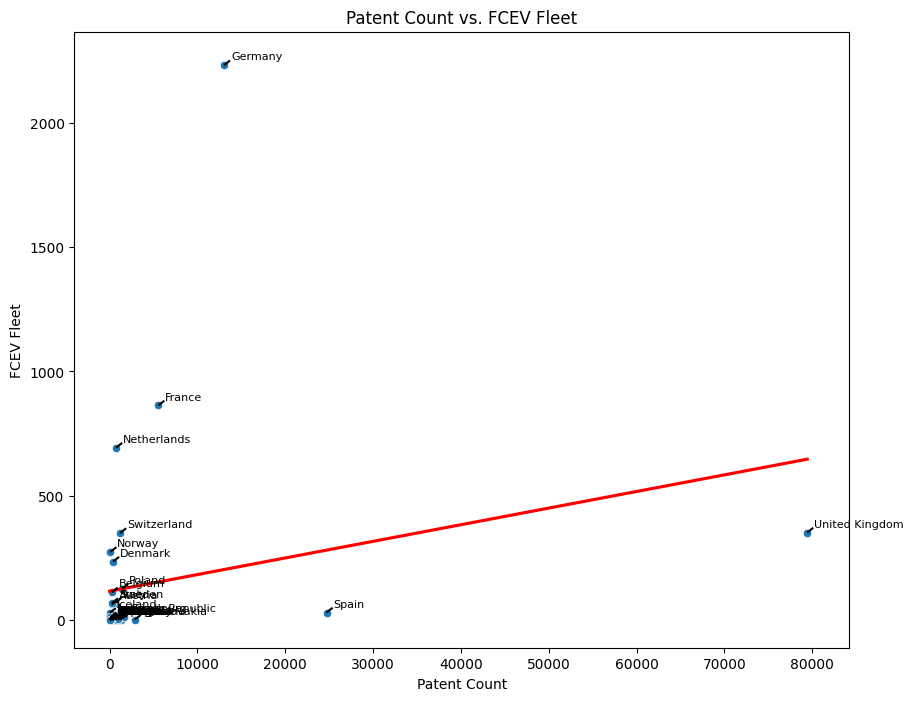

In [175]:
def create_correlation_plots(dataframe, var_pairs):
    for x_var, y_var in var_pairs:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=x_var, y=y_var, data=dataframe)
        sns.regplot(x=x_var, y=y_var, data=dataframe, scatter=False, color='r', ci=None)
        
        # Calculate offset based on data range
        x_range = dataframe[x_var].max() - dataframe[x_var].min()
        y_range = dataframe[y_var].max() - dataframe[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01
        
        for i in range(len(dataframe)):
            plt.text(dataframe[x_var][i] + x_offset, dataframe[y_var][i] + y_offset, dataframe['Country'][i], fontsize=8)
            plt.plot([dataframe[x_var][i], dataframe[x_var][i] + x_offset], [dataframe[y_var][i], dataframe[y_var][i] + y_offset], color='black', linestyle='--')
        
        plt.title(f'{x_var} vs. {y_var}')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.show()

all_variable_pairs = [
    ('Output T/year', 'Total consumption'),
    ('Count Research', 'Patent Count'),
    ('Number Stations', 'FCEV Fleet'),
    ('Value (€/kg)', 'FCEV Fleet'),
    ('Output T/year', 'Number Stations'),  
    ('Total consumption', 'Value (€/kg)'),  
    ('Total consumption', 'FCEV Fleet'),  
    ('Count Research', 'FCEV Fleet'),  
    ('Patent Count', 'FCEV Fleet')
]

# Create correlation plots
create_correlation_plots(merged_df_new, all_variable_pairs)


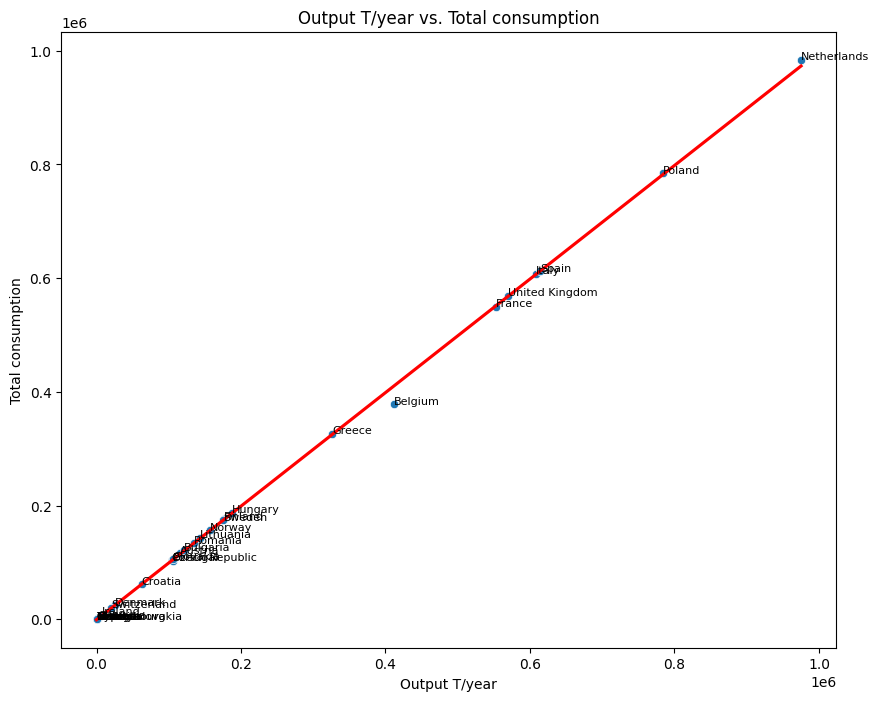

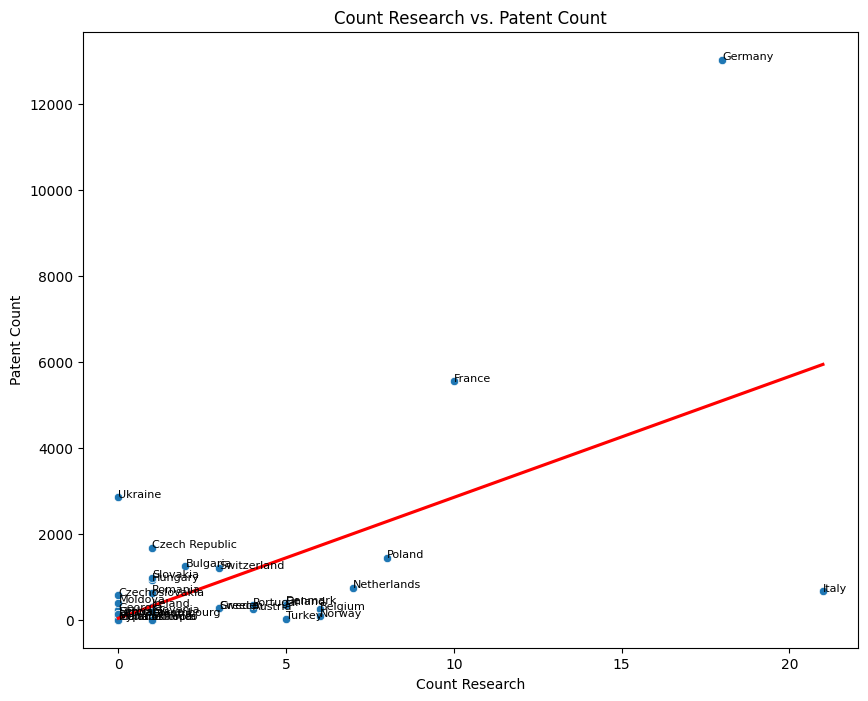

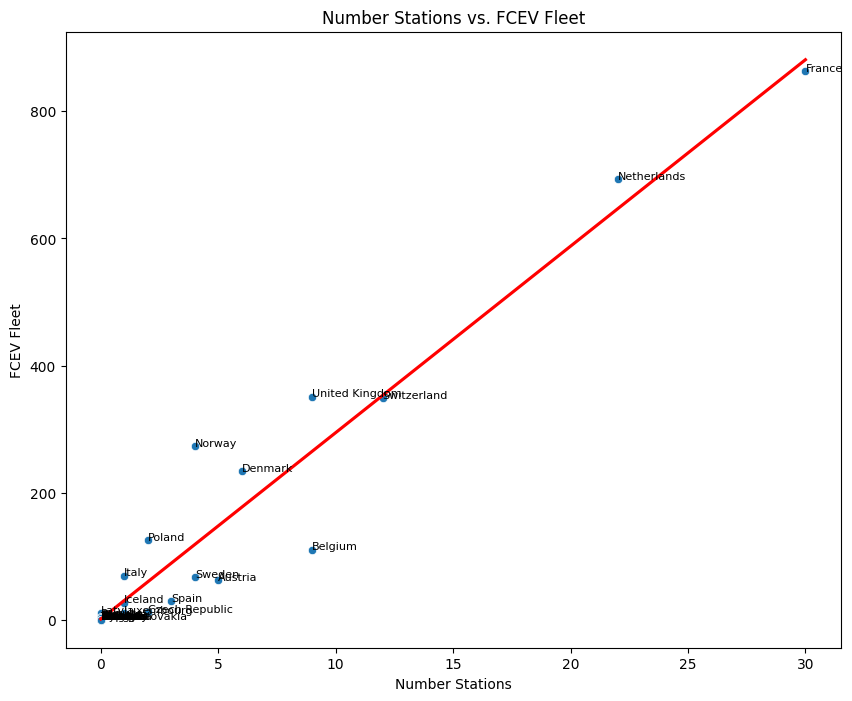

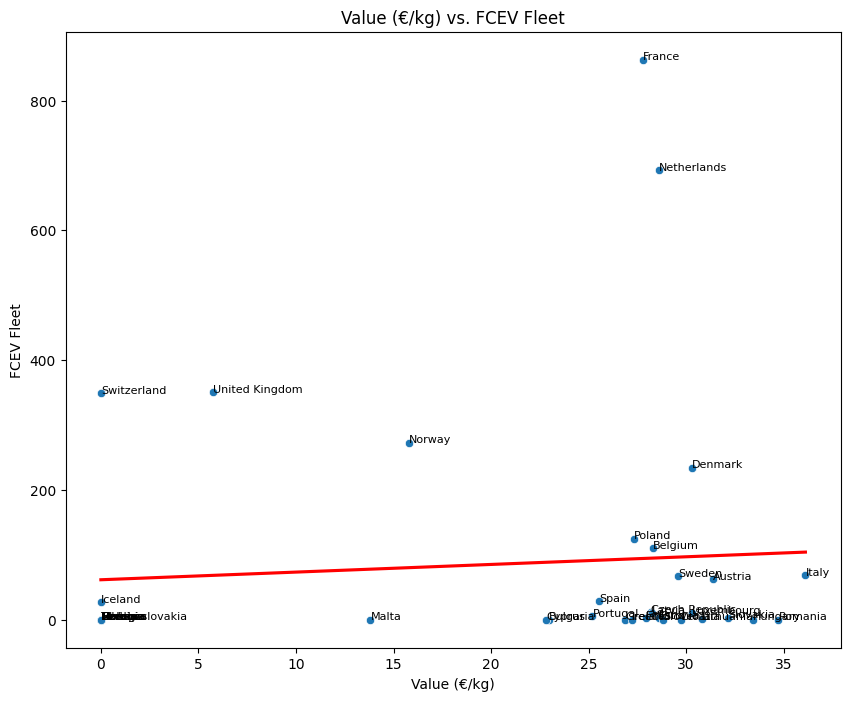

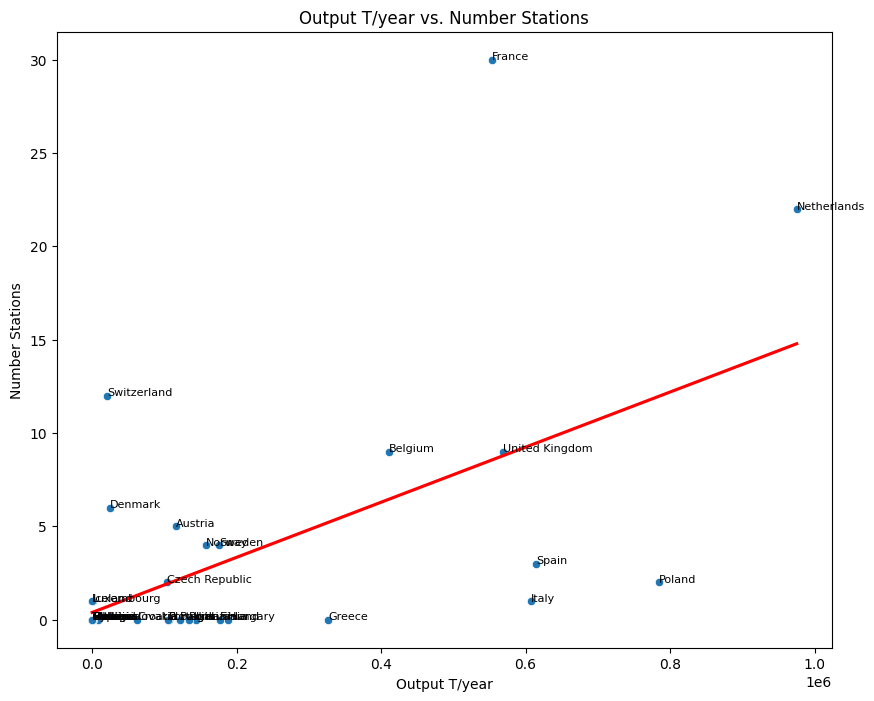

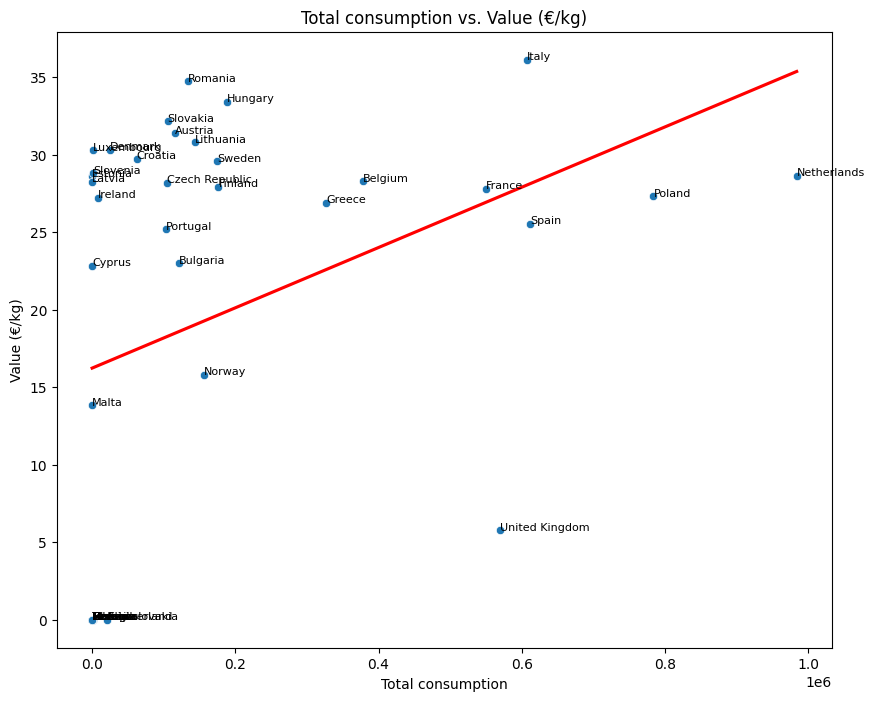

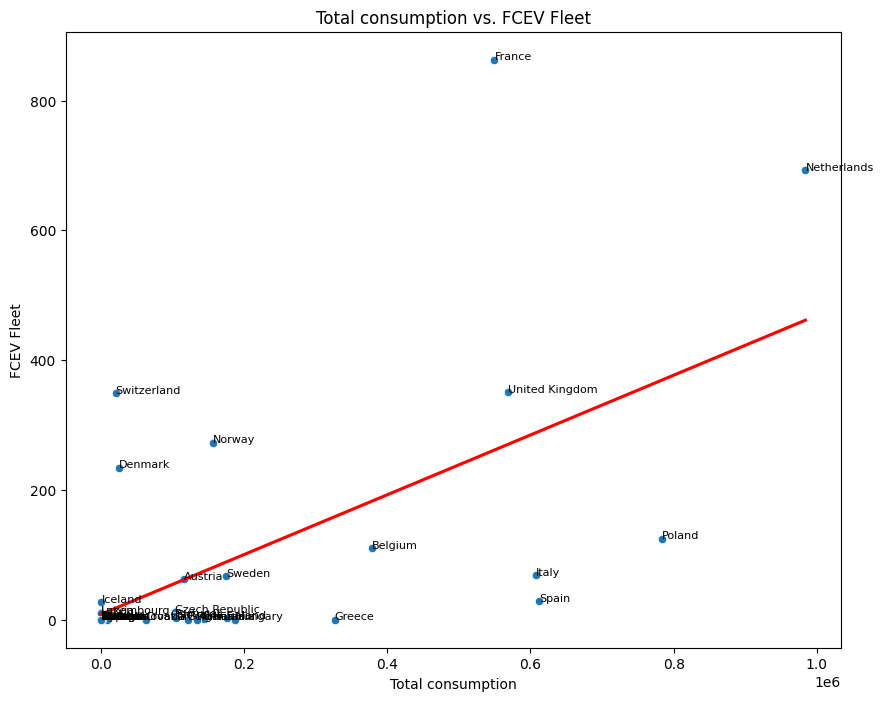

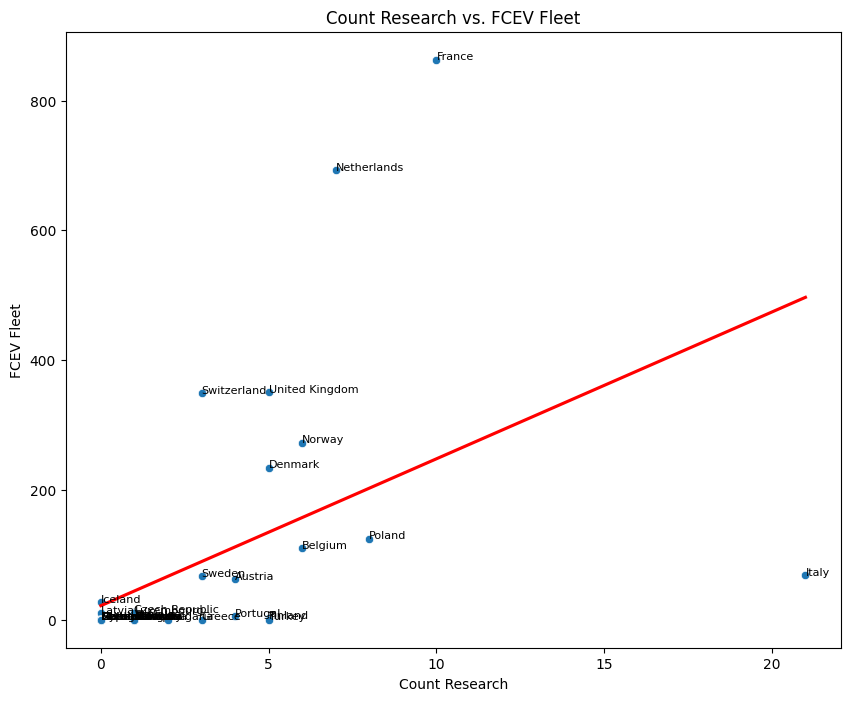

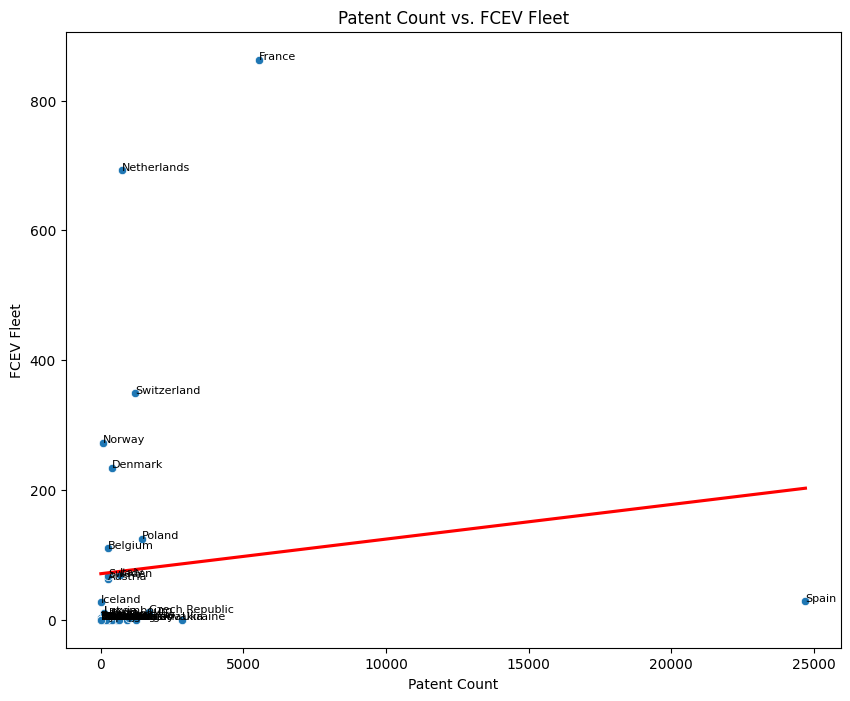

In [178]:
import numpy as np

def create_correlation_plots(dataframe, var_pairs, outlier_threshold=3):
    for x_var, y_var in var_pairs:
        plt.figure(figsize=(10, 8))
        
        # Calculate z-scores for x and y variables
        z_scores_x = np.abs((dataframe[x_var] - dataframe[x_var].mean()) / dataframe[x_var].std())
        z_scores_y = np.abs((dataframe[y_var] - dataframe[y_var].mean()) / dataframe[y_var].std())
        
        # Filter out points with z-scores beyond the threshold
        filtered_df = dataframe[(z_scores_x < outlier_threshold) & (z_scores_y < outlier_threshold)]
        
        sns.scatterplot(x=x_var, y=y_var, data=filtered_df)
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='r', ci=None)
        
        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_var].iloc[i], filtered_df[y_var].iloc[i], filtered_df['Country'].iloc[i], fontsize=8)
        
        plt.title(f'{x_var} vs. {y_var}')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.show()

# Define variable pairs of interest
variable_pairs = [
    ('Output T/year', 'Total consumption'),
    ('Count Research', 'Patent Count'),
    ('Number Stations', 'FCEV Fleet'),
    ('Value (€/kg)', 'FCEV Fleet'),
    ('Output T/year', 'Number Stations'),  
    ('Total consumption', 'Value (€/kg)'),  
    ('Total consumption', 'FCEV Fleet'),  
    ('Count Research', 'FCEV Fleet'),  
    ('Patent Count', 'FCEV Fleet')
]

# Create correlation plots with outlier removal
create_correlation_plots(merged_df_new, variable_pairs, outlier_threshold=3)